In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
warnings.filterwarnings("ignore")

# **Original Data Overview**

In [ ]:
# local path to the dataset
df = pd.read_csv('./thyroidDF.csv')

print(df.head())

Mounted at /content/drive
   age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   

  T4U FTI_measured

In [ ]:
df.shape

(9172, 31)

In [ ]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
df.isnull().sum()

,0
age,0
sex,307
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [ ]:
# all numeric imput 0 for false
# sex data - median

# **DATA CLEANING**

**Converting Sex column to categorical**

In [ ]:
#gender
gender_map={}
gender_count = 1
for val in df['sex'].unique():
    if not(pd.isna(val)):
        print(val)
        if val not in gender_map.keys() :
            gender_map[val] = gender_count
            gender_count = gender_count+1
print(gender_map)

F
M
{'F': 1, 'M': 2}


In [ ]:
df['sex'] = df['sex'].apply(lambda x: gender_map[x] if not pd.isna(x) else x)

In [ ]:
df['sex'].unique()

array([ 1.,  2., nan])

**Imputing missing values in sex column with median value**

In [ ]:
median = df['sex'].median()

# Fill NaN values in the 'sex' column with the median value
df['sex'] = df['sex'].fillna(median)

In [ ]:
reverse_gender_map = {v: k for k, v in gender_map.items()}
df['sex'] = df['sex'].apply(lambda x: reverse_gender_map[x])

In [ ]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

**Filling the numeric missing values with 0**

In [ ]:
df.replace("", np.nan, inplace=True)
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


**Dropping insignificant columns**

In [ ]:
df.drop(columns=["patient_id","referral_source"],axis=1, inplace=True)

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,0.0,f,0.0,f,0.0,f,0.0,f,0.0,-
1,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,0.0,f,0.0,f,0.0,-
2,41,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,11.0,-
3,36,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,26.0,-
4,32,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,36.0,S


**Handling outliers using z score**

In [ ]:


from collections import defaultdict
cols = df.select_dtypes(include=['float']).columns #array of all numerical rows. this method is better than hardcoding it

count_map = defaultdict(dict) #creating a dict to keep count of the number of replaced values

def get_z(col):
    mean = sum(col) / len(col)

    #std deviation
    variance = sum((x - mean) ** 2 for x in col) / len(col)
    std_dev = variance ** 0.5

    z_scores = [(x - mean) / std_dev for x in col]

    return z_scores

#usually the accepted values is mean +- 2(std deviation), so lets set threshhhold as 3
thresh = 3

for col in cols:
    z = get_z(df[col])
    med = df[col].median()

    for i, score in enumerate(z):
        if abs(score) > thresh:
            if col not in count_map.keys():
                count_map[col] = 1
            else:
                count_map[col] = count_map[col] + 1
            df.loc[i, col] = med

print("Count of replaced outliers in each column",count_map)
df.head()

Count of replaced outliers in each column defaultdict(<class 'dict'>, {'TSH': 102, 'T3': 70, 'TT4': 75, 'T4U': 17, 'FTI': 68, 'TBG': 235})


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,0.0,f,0.0,f,0.0,f,0.0,f,0.0,-
1,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,0.0,f,0.0,f,0.0,-
2,41,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,11.0,-
3,36,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,0.0,-
4,32,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,0.0,S


    Mapping of the target column with the disease inference


    Hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic

    Hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

    Binding protein:

    I   increased binding protein
    J   decreased binding protein

    General health:

    K   concurrent non-thyroidal illness

    Replacement therapy:

    L   consistent with replacement therapy
    M   underreplaced
    N   overreplaced

    Antithyroid treatment:

    O   antithyroid drugs
    P   I131 treatment
    Q   surgery

    Miscellaneous:

    R   discordant assay results
    S   elevated TBG
    T   elevated thyroid hormones


    Based on the above categorization, we are grouping the target column into 8 groups which are:
    1. Hypothyroid conditions
    2. Hypothyroid conditions
    3. Negative

In [ ]:
df["target"].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

# Hypothyroidism and Thyroid Function Tests

## Notes
- **RST**: Drop all zeroes.
- **IJ**: Only one value.
- **O**: 4 F values, total = 14 (hyperthyroidism).
- **P**: All T values, total = 5 (hyperthyroidism).
- **Q**: All T values, total = 14 (hyperthyroidism).
- **Replacement Therapy**: Hypothyroidism.
- **TSH Levels**:
  - If TSH is high: The patient may be under-replaced (hypothyroidism).
  - If TSH is low: The patient may be over-replaced (hyperthyroidism).
  - **Normal Range**: Typically around 0.4 - 4.0 mIU/L, but the exact range can vary slightly depending on the lab.
- **K**: Negative.
- **Concurrent Non-Thyroidal Illness (NTI)**: Also known as euthyroid sick syndrome, refers to abnormalities in thyroid function tests that occur in patients with a serious illness not directly related to the thyroid gland. Even though the thyroid function tests may be abnormal, the thyroid gland itself is not the primary cause of the issue.


In [ ]:
df = df.loc[~df["target"].isin(["R","S","T","I","J"])]

In [ ]:
map = {"Hyperthyroid" : ["A","B","C","D","N","O","P","Q","AK","C|I","OI","D|R"],"Hypothyroid" : ["E","F","G","H","L","M","MK","LJ","H|K","GK","MI","FK","GI","GKJ"],"Negative" : ["-","K","KJ"]}

In [ ]:
for key,value in map.items():
  for val in value:
    df["target"].replace(val,key,inplace=True)

In [ ]:
df["target"].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

#**EDA** <br> Distribution of Target

**dropping inconsequential columns**

In [ ]:
# dropping inconsequential columns
df.drop(columns=["TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"],axis=1, inplace=True)

**encoding the string columns**

In [ ]:
# encoding the string columns
df["on_thyroxine"].replace("t",True, inplace=True)
df["on_thyroxine"].replace("f",False, inplace=True)

df["query_on_thyroxine"].replace("t",True, inplace=True)
df["query_on_thyroxine"].replace("f",False, inplace=True)

df["on_antithyroid_meds"].replace("t",True, inplace=True)
df["on_antithyroid_meds"].replace("f",False, inplace=True)

df["sick"].replace("t",True, inplace=True)
df["sick"].replace("f",False, inplace=True)

df["pregnant"].replace("t",True, inplace=True)
df["pregnant"].replace("f",False, inplace=True)

df["thyroid_surgery"].replace("t",True, inplace=True)
df["thyroid_surgery"].replace("f",False, inplace=True)

df["I131_treatment"].replace("t",True, inplace=True)
df["I131_treatment"].replace("f",False, inplace=True)

df["query_hypothyroid"].replace("t",True, inplace=True)
df["query_hypothyroid"].replace("f",False, inplace=True)

df["query_hyperthyroid"].replace("t",True, inplace=True)
df["query_hyperthyroid"].replace("f",False, inplace=True)

df["lithium"].replace("t",True, inplace=True)
df["lithium"].replace("f",False, inplace=True)

df["goitre"].replace("t",True, inplace=True)
df["goitre"].replace("f",False, inplace=True)

df["tumor"].replace("t",True, inplace=True)
df["tumor"].replace("f",False, inplace=True)

df["hypopituitary"].replace("t",True, inplace=True)
df["hypopituitary"].replace("f",False, inplace=True)

df["psych"].replace("t",True, inplace=True)
df["psych"].replace("f",False, inplace=True)



**one hot encoding of the target column**

In [ ]:
# one hot encoding of the target column
df = pd.get_dummies(df,columns=["target","sex"])
df.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,T3,TT4,T4U,FTI,TBG,target_Hyperthyroid,target_Hypothyroid,target_Negative,sex_F,sex_M
0,29,False,False,False,False,False,False,False,True,False,...,0.0,0.0,0.0,0.0,0.0,False,False,True,True,False
1,29,False,False,False,False,False,False,False,False,False,...,1.9,128.0,0.0,0.0,0.0,False,False,True,True,False
2,41,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,11.0,False,False,True,True,False
3,36,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,False,False,True,True,False
5,60,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,False,False,True,True,False


In [ ]:
# after analysing the correlation matrix, we are dropping the not related columns
df.drop(columns=["age","query_on_thyroxine","sick","thyroid_surgery","I131_treatment","lithium","goitre","tumor","hypopituitary"],axis=1, inplace=True)

In [ ]:
df.describe()

,TSH,T3,TT4,T4U,FTI,TBG
count,8515.000000,8515.000000,8515.000000,8515.000000,8515.000000,8515.000000
mean,2.855447,1.356922,100.474065,0.880071,101.524356,0.233664
std,6.771410,1.017801,37.348123,0.309657,43.182149,2.083411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,84.000000,0.820000,88.000000,0.000000
50%,1.200000,1.600000,101.000000,0.940000,106.000000,0.000000
75%,2.500000,2.100000,120.000000,1.040000,124.000000,0.000000
max,74.000000,4.900000,233.000000,1.860000,256.000000,22.000000


In [ ]:
# normalizing the numeric values (for the downstream models)
features = df.select_dtypes(include=np.number).columns
for feature in features:
    min_val = df[feature].min()
    max_val = df[feature].max()
    df[feature] = (df[feature] - min_val) / (max_val - min_val)

In [ ]:
df.describe()

,TSH,T3,TT4,T4U,FTI,TBG
count,8515.000000,8515.000000,8515.000000,8515.000000,8515.000000,8515.000000
mean,0.038587,0.276923,0.431219,0.473156,0.396580,0.010621
std,0.091506,0.207714,0.160292,0.166482,0.168680,0.094701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003378,0.000000,0.360515,0.440860,0.343750,0.000000
50%,0.016216,0.326531,0.433476,0.505376,0.414062,0.000000
75%,0.033784,0.428571,0.515021,0.559140,0.484375,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Phase 2**

Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X = df.drop(columns=['target_Hyperthyroid', 'target_Hypothyroid', 'target_Negative'])
y = df[['target_Hyperthyroid', 'target_Hypothyroid', 'target_Negative']]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# NN class
class ThyroidClassifier(nn.Module):
    def __init__(self, input_size):
        super(ThyroidClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(32, 3)  # Output layer with 3 neurons for 3 classes
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x
input_size = X_train.shape[1]
model = ThyroidClassifier(input_size)
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
epochs = 50
batch_size = 32

train_losses = []
train_accuracies = []

# Training loop
for epoch in range(epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_samples = 0

    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = torch.argmax(y_train_tensor[i:i+batch_size], dim=1)  # Use argmax for CrossEntropyLoss

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.long())  # Convert labels to long for CrossEntropyLoss
        loss.backward()
        optimizer.step()

        # Accumulate loss
        epoch_loss += loss.item()

        # Calculate accuracy
        predicted_classes = torch.argmax(outputs, dim=1)
        correct_predictions += (predicted_classes == labels).sum().item()
        total_samples += labels.size(0)

    # Calculate average loss and accuracy for the epoch
    avg_loss = epoch_loss / len(X_train_tensor)
    accuracy = correct_predictions / total_samples

    # Save metrics
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

# Evaluation on test set
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted_classes = torch.argmax(outputs, dim=1)
    true_classes = torch.argmax(y_test_tensor, dim=1)
    accuracy = (predicted_classes == true_classes).sum().item() / len(X_test_tensor)
    print(f"Test Accuracy: {accuracy:.4f}")


Epoch [1/50], Loss: 0.0233, Accuracy: 0.8532
Epoch [2/50], Loss: 0.0207, Accuracy: 0.8936
Epoch [3/50], Loss: 0.0202, Accuracy: 0.9083
Epoch [4/50], Loss: 0.0201, Accuracy: 0.9105
Epoch [5/50], Loss: 0.0199, Accuracy: 0.9157
Epoch [6/50], Loss: 0.0199, Accuracy: 0.9151
Epoch [7/50], Loss: 0.0199, Accuracy: 0.9178
Epoch [8/50], Loss: 0.0199, Accuracy: 0.9154
Epoch [9/50], Loss: 0.0198, Accuracy: 0.9188
Epoch [10/50], Loss: 0.0198, Accuracy: 0.9194
Epoch [11/50], Loss: 0.0198, Accuracy: 0.9168
Epoch [12/50], Loss: 0.0198, Accuracy: 0.9201
Epoch [13/50], Loss: 0.0198, Accuracy: 0.9184
Epoch [14/50], Loss: 0.0198, Accuracy: 0.9185
Epoch [15/50], Loss: 0.0198, Accuracy: 0.9182
Epoch [16/50], Loss: 0.0197, Accuracy: 0.9203
Epoch [17/50], Loss: 0.0197, Accuracy: 0.9203
Epoch [18/50], Loss: 0.0197, Accuracy: 0.9210
Epoch [19/50], Loss: 0.0198, Accuracy: 0.9197
Epoch [20/50], Loss: 0.0198, Accuracy: 0.9196
Epoch [21/50], Loss: 0.0198, Accuracy: 0.9196
Epoch [22/50], Loss: 0.0197, Accuracy: 0.92

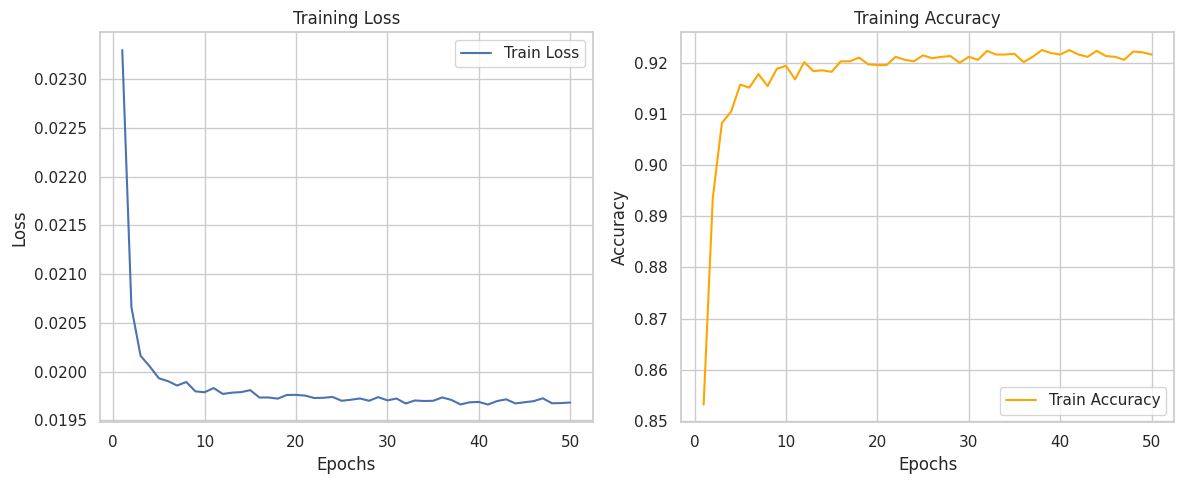

In [ ]:

# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Prepare the data
X = df.drop(columns=['target_Hyperthyroid', 'target_Hypothyroid', 'target_Negative'])
y = df[['target_Hyperthyroid', 'target_Hypothyroid', 'target_Negative']]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the training set
y_train_probs = linear_model.predict(X_train)
y_train_pred = np.argmax(y_train_probs, axis=1)
y_train_labels = np.argmax(y_train, axis=1)

# Compute training loss (Mean Squared Error)
train_loss = mean_squared_error(y_train, y_train_probs)

# Compute training accuracy
train_accuracy = accuracy_score(y_train_labels, y_train_pred)

# Print training metrics
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Predict on the test set
y_test_probs = linear_model.predict(X_test)
y_test_pred = np.argmax(y_test_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Test metrics
test_accuracy = accuracy_score(y_test_labels, y_test_pred)
print("\nTest Results:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test_labels, y_test_pred))



Training Loss: 0.0617
Training Accuracy: 0.8780

Test Results:
Test Accuracy: 0.8655
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.86      0.26      0.40       190
           2       0.87      1.00      0.93      1428

    accuracy                           0.87      1703
   macro avg       0.58      0.42      0.44      1703
weighted avg       0.82      0.87      0.82      1703



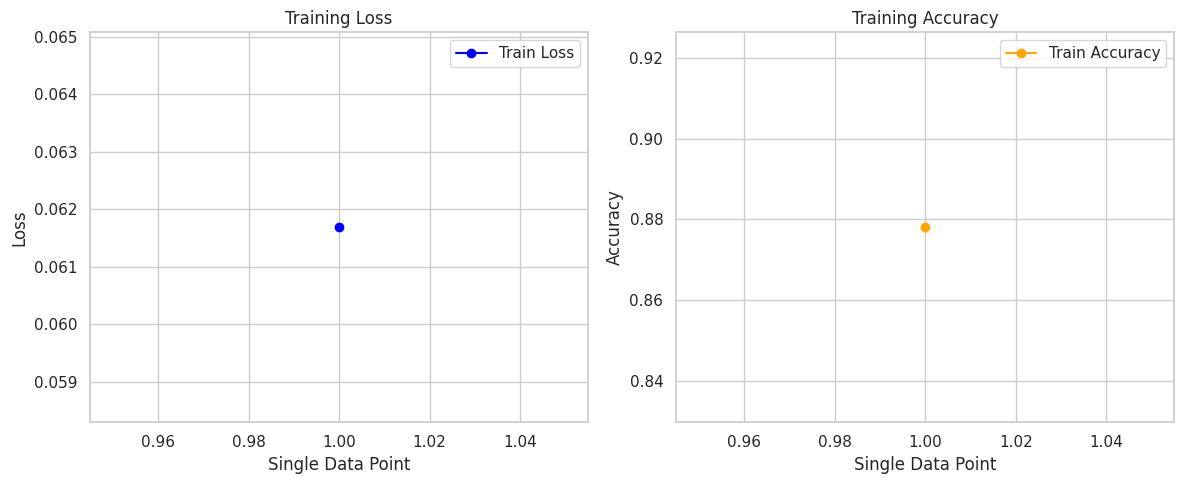

In [ ]:
# Plot training loss and accuracy as line graphs (single point)
plt.figure(figsize=(12, 5))

# Training loss line graph
plt.subplot(1, 2, 1)
plt.plot([1], [train_loss], marker='o', label='Train Loss', color='blue')
plt.xlabel('Single Data Point')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Training accuracy line graph
plt.subplot(1, 2, 2)
plt.plot([1], [train_accuracy], marker='o', label='Train Accuracy', color='orange')
plt.xlabel('Single Data Point')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Decision Tree

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

# Prepare the data
X = df.drop(columns=['target_Hyperthyroid', 'target_Hypothyroid', 'target_Negative'])
y = df[['target_Hyperthyroid', 'target_Hypothyroid', 'target_Negative']]

# Convert target to single column for DecisionTreeClassifier
y_single_column = np.argmax(y.values, axis=1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_single_column, test_size=0.2, random_state=42)

# Initialize a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Cross-validation to capture accuracies
train_accuracies = cross_val_score(decision_tree, X_train, y_train, cv=100)


decision_tree.fit(X_train, y_train)
# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9530240751614797
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        85
           1       0.90      0.82      0.85       190
           2       0.97      0.99      0.98      1428

    accuracy                           0.95      1703
   macro avg       0.86      0.83      0.85      1703
weighted avg       0.95      0.95      0.95      1703



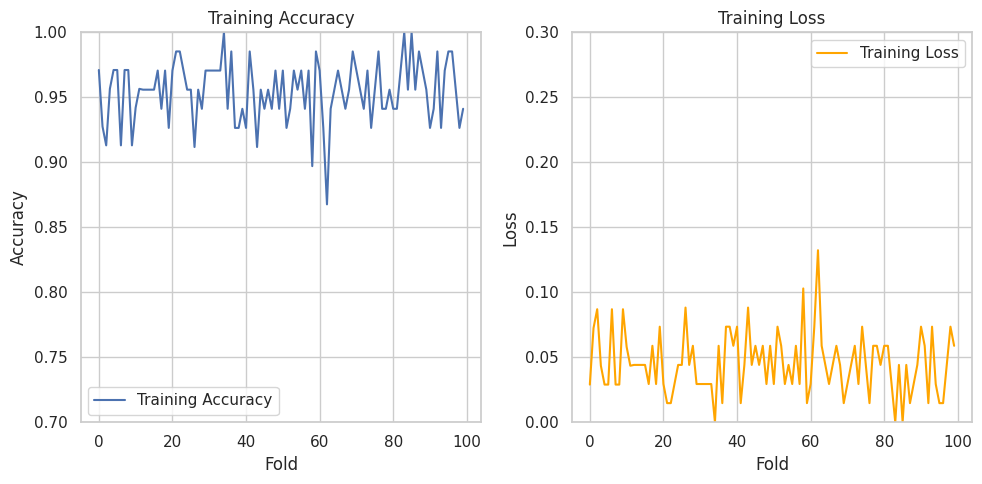

In [ ]:
# Plotting training accuracy and loss graphs
plt.figure(figsize=(10, 5))

# Plot Train Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)
plt.legend()

# Simulate Train Loss
train_losses = [1 - acc for acc in train_accuracies]
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss', color='orange')
plt.title('Training Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.ylim(0, 0.3)
plt.legend()

plt.tight_layout()
plt.show()

XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
X = df.drop(columns=['target_Hyperthyroid', 'target_Hypothyroid', 'target_Negative'])
y = df[['target_Hyperthyroid', 'target_Hypothyroid', 'target_Negative']]

# Convert target to single column for xgboost
y_single_column = np.argmax(y.values, axis=1)

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y_single_column, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize and train an XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    random_state=42,
    eval_metric=['mlogloss', 'merror']  # Track log loss and classification error
)


# Fit the model and store evaluation results
eval_set = [(X_train, y_train), (X_val, y_val)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)


# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9757433489827856
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        58
           1       0.93      0.93      0.93       135
           2       0.99      0.99      0.99      1085

    accuracy                           0.98      1278
   macro avg       0.94      0.90      0.92      1278
weighted avg       0.98      0.98      0.98      1278



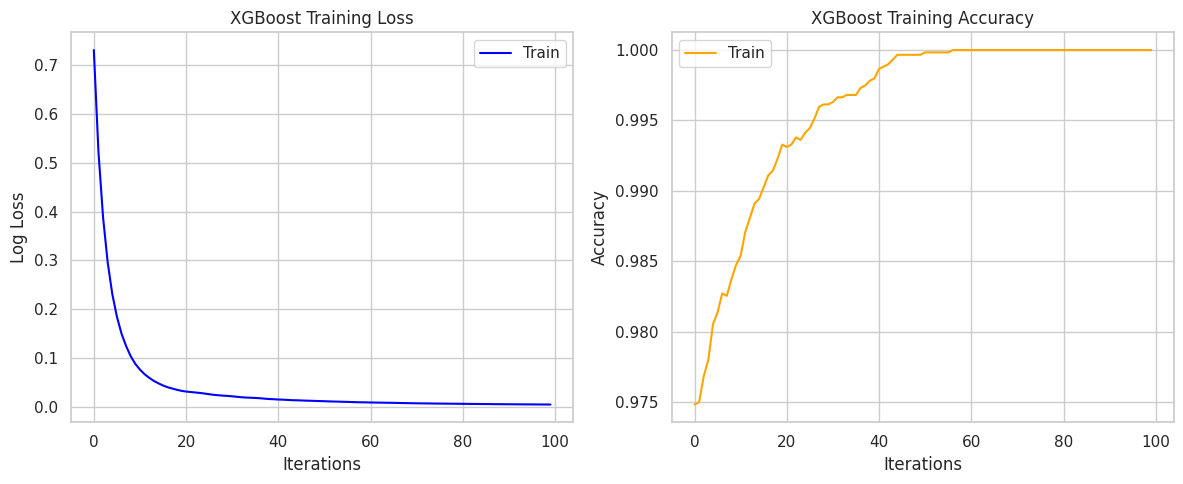

In [ ]:

# Retrieve evaluation results
results = xgb_model.evals_result()

# Plot training loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(results['validation_0']['mlogloss'], label='Train',color='blue')
# plt.plot(results['validation_1']['mlogloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training Loss')
plt.legend()

# Plot training accuracy (1 - classification error)
plt.subplot(1, 2, 2)
plt.plot([1 - x for x in results['validation_0']['merror']], label='Train',color='orange')
# plt.plot([1 - x for x in results['validation_1']['merror']], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('XGBoost Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

SVM

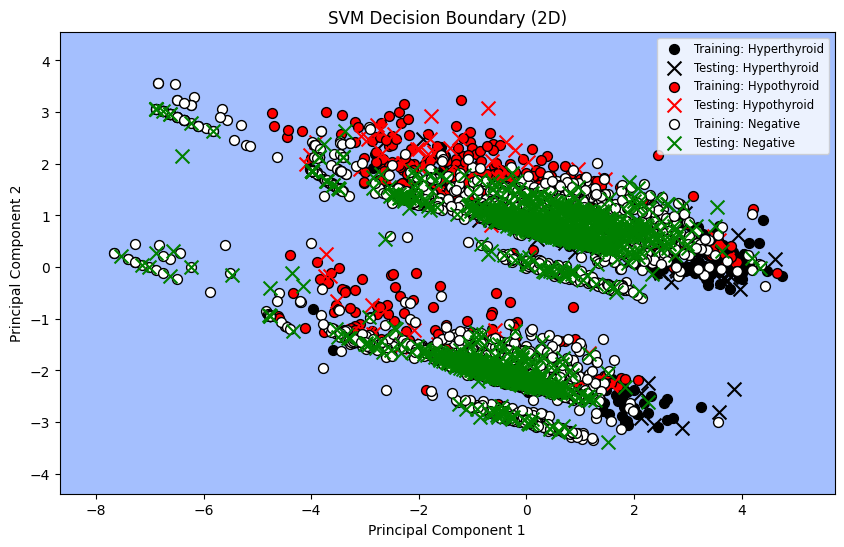

Test Accuracy: 0.8385202583675866
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.00      0.00      0.00       190
           2       0.84      1.00      0.91      1428

    accuracy                           0.84      1703
   macro avg       0.28      0.33      0.30      1703
weighted avg       0.70      0.84      0.76      1703



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data (assuming X and y are defined)
X = df.drop(columns=['target_Hyperthyroid', 'target_Hypothyroid', 'target_Negative'])
y = df[['target_Hyperthyroid', 'target_Hypothyroid', 'target_Negative']]

# Convert target to a single column for SVM
y_single_column = np.argmax(y.values, axis=1)

# Map target classes to thyroid conditions
class_labels = {0: 'Hyperthyroid', 1: 'Hypothyroid', 2: 'Negative'}
color_map = {0: 'black', 1: 'red', 2: 'white',3 : 'green'}  # Color mapping for classes

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_2D, y_single_column, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42, decision_function_shape='ovo')  # One v One strategy to make SVM a multiclass classifier
svm_model.fit(X_train, y_train)

# Plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
# Updated plotting code with green color for testing "Negative" class
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Plot training and testing points with distinct labels and colors
for class_value, label in class_labels.items():
    # Training points
    plt.scatter(
        X_train[y_train == class_value, 0],
        X_train[y_train == class_value, 1],
        label=f'Training: {label}',
        color=color_map[class_value],
        edgecolors='k',
        marker='o',
        s=50
    )
    # Testing points
    # If the class is "Negative", change the testing color to green
    plt.scatter(
        X_test[y_test == class_value, 0],
        X_test[y_test == class_value, 1],
        label='Testing: Negative' if class_value == 2 else f'Testing: {label}',
        color='green' if class_value == 2 else color_map[class_value],
        edgecolors='k',
        marker='x',
        s=100
    )

plt.title('SVM Decision Boundary (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', fontsize='small')
plt.show()

# Evaluate the SVM model
y_pred = svm_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


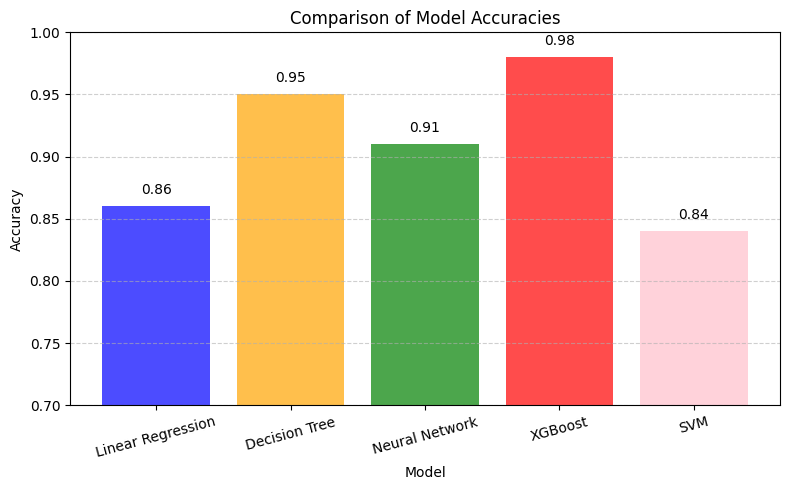

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree', 'Neural Network', "XGBoost", "SVM"]
accuracies = [0.86, 0.95, 0.91, 0.98, 0.84]  # Final training accuracies of each model

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'pink'], alpha=0.7)

# Adding labels and title
plt.ylim(0.7, 1.0)  # Set y-axis range
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate the bars with accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()
